# Template detection

In [21]:
import warnings
warnings.filterwarnings("ignore") 

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
import os
os.chdir(r'C:\Users\Gaya\Desktop\Python Open CV\[FreeCourseSite.com] Udemy - Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\3.1 Computer-Vision-with-Python\Computer-Vision-with-Python\DATA')

# ---------------

# eval 'magic' method

In [2]:
sum([1,2,3])

6

In [3]:
mystring = 'sum'

In [6]:
myfunc = eval(mystring)

In [7]:
myfunc([1,2,3])

6

# ---------------

In [10]:
full = cv2.imread('sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

In [11]:
face = cv2.imread('sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

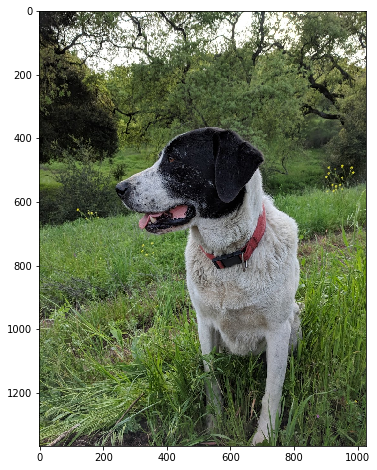

In [13]:
plt.figure(figsize=(12,8))
plt.imshow(full)

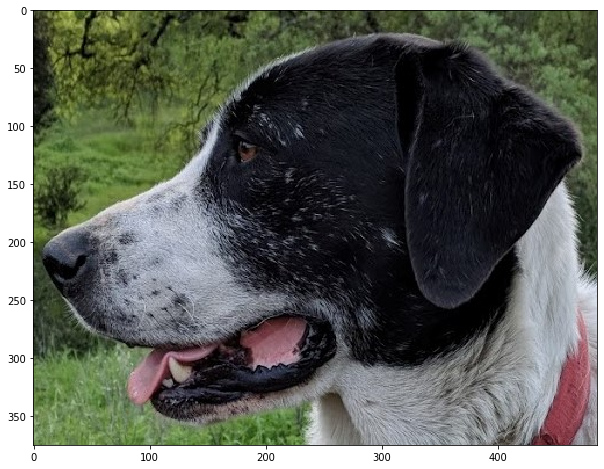

In [14]:
plt.figure(figsize=(12,8))
plt.imshow(face)

In [16]:
print(full.shape)
print(face.shape)

(1367, 1025, 3)
(375, 486, 3)


In [15]:
height, width, channels = face.shape

In [17]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

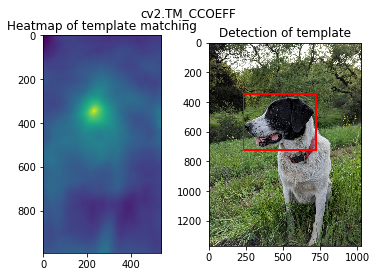

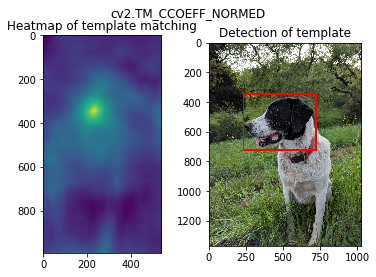

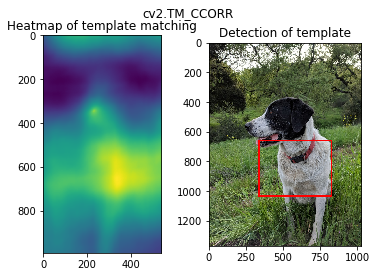

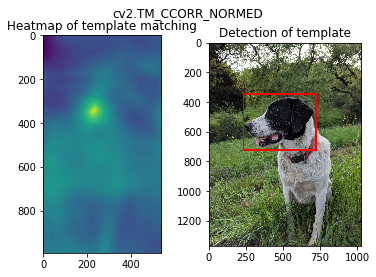

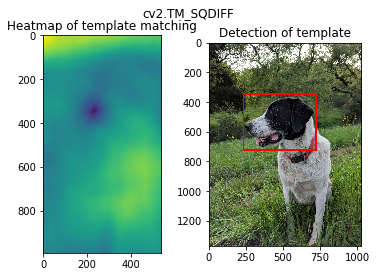

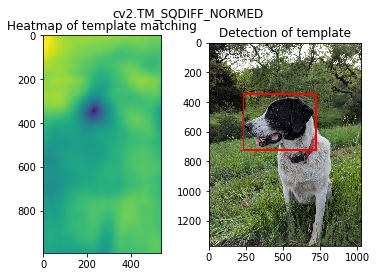

In [23]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n')
    print('\n')

# Corner detection

## Harris method

import warnings
warnings.filterwarnings("ignore") 

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
import os
os.chdir(r'C:\Users\Gaya\Desktop\Python Open CV\[FreeCourseSite.com] Udemy - Python for Computer Vision with OpenCV and Deep Learning\1. Course Overview and Introduction\3.1 Computer-Vision-with-Python\Computer-Vision-with-Python\DATA')

In [65]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

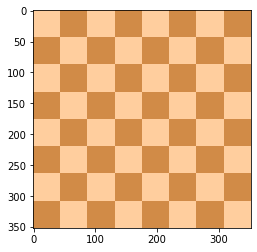

In [66]:
plt.imshow(flat_chess)

In [67]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

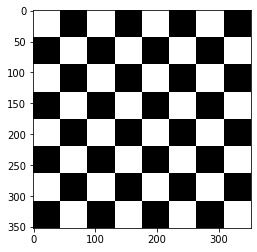

In [68]:
plt.imshow(gray_flat_chess,cmap='gray')

In [69]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

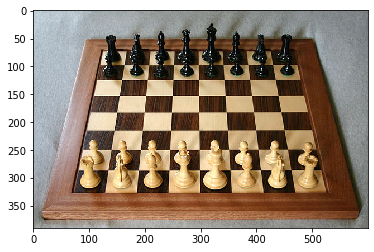

In [70]:
plt.imshow(real_chess)

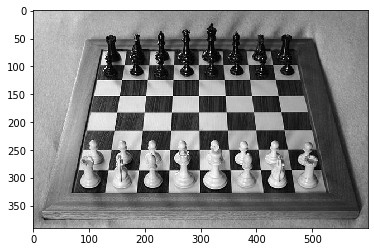

In [71]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [72]:
gray_flat_chess

array([[215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       [215, 215, 215, ..., 152, 152, 152],
       ...,
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215],
       [152, 152, 152, ..., 215, 215, 215]], dtype=uint8)

In [73]:
gray_flat = np.float32(gray_flat_chess)
gray_real = np.float32(gray_real_chess)

In [74]:
gray_flat

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [75]:
dst = cv2.cornerHarris(src=gray_flat,blockSize=2,ksize=3,k=0.04)

In [76]:
dst = cv2.dilate(dst,None)

In [77]:
dst.max()

1230700.1

In [78]:
flat_chess[dst>0.01*dst.max()] = [255,0,0] #RGB

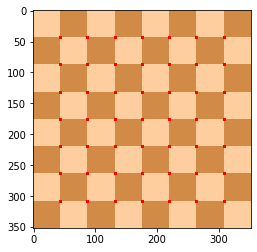

In [79]:
plt.imshow(flat_chess)

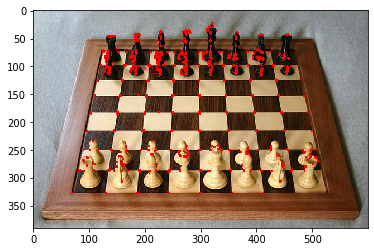

In [80]:
dst = cv2.cornerHarris(src=gray_real,blockSize=2,ksize=3,k=0.04)
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0] #RGB
plt.imshow(real_chess)

# Shi-Tomasi method

In [113]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

In [114]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,30,0.01,10) #-1 instead of 5 to detect as much corners as possible

In [115]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]]], dtype=float32)

In [116]:
corners = np.int0(corners)

In [117]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),5,(255,0,0),-1)

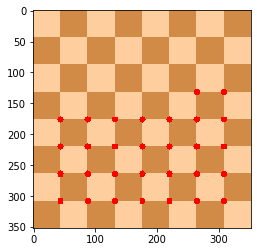

In [118]:
plt.imshow(flat_chess)

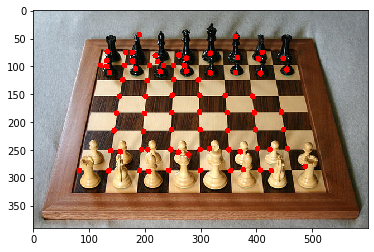

In [119]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),5,(255,0,0),-1)

plt.imshow(real_chess)